In [1]:
import numpy as np
import PIL.Image
import glob
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IMAGE_SIZE = (400, 150, 3)
RESIZED_SIZE = (100, 50, 3)
RESIZED_SIZE_PIL = (RESIZED_SIZE[1], RESIZED_SIZE[0], RESIZED_SIZE[2])
DATASET_PATH = "./dataset/"
DATASET_PATH = os.path.abspath(DATASET_PATH)
CLASSES = glob.glob(f"{DATASET_PATH}/*")
CLASSES = list(map(lambda f: f.split("/")[-1], CLASSES))

print(DATASET_PATH)
print(CLASSES)

/tmp/deepl/dataset
['octane', 'werewolf', 'breakout', 'aftershock']


In [3]:
def load_data():
    # Récupération des fichiers
    files = glob.glob(f"{DATASET_PATH}/**/*.jpg", recursive = True)

    # Initialise les structures de données
    x = np.zeros((len(files), *RESIZED_SIZE_PIL))
    y = np.zeros((len(files), 1))

    # print(f"x.shape = {x.shape}")

    for i, path in enumerate(files):
        # Lecture de l'image
        img = PIL.Image.open(path)

        # print(f"img.size = {img.size}")

        # Redimensionnement de l'image
        img = img.resize(RESIZED_SIZE[:-1], PIL.Image.ANTIALIAS)

        # print(f"img.size = {img.size}")

        test = np.asarray(img)

        # print(f"test.shape = {test.shape}")

        # Remplissage de la variable x
        x[i] = test

        # On récupère l'index dans le path
        class_label = path.split("/")[-2]

        # On récupère le numéro de la classe à partir du string
        class_label = CLASSES.index(class_label)
        
        # Remplissage de la variable y
        y[i] = class_label

    return x, y

In [4]:
x, y = load_data()
x = x / 255

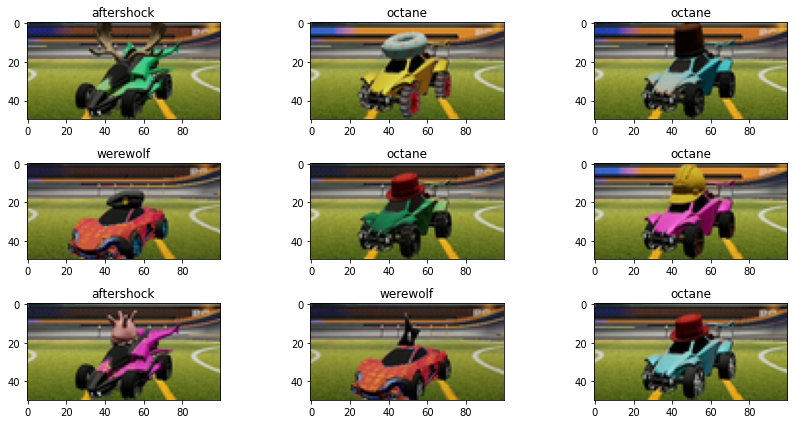

In [5]:
# Randomisation des indices et affichage de 9 images alétoires de la base d'apprentissage
indices = np.arange(x.shape[0])
np.random.shuffle(indices)

plt.figure(figsize=(12, 6))

for i in range(0, 3*3):
    plt.subplot(3, 3, i+1)
    plt.title(CLASSES[int(y[indices[i]])])
    plt.imshow(x[indices[i]])

plt.tight_layout()
plt.show()

In [6]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import optimizers

In [7]:
model = Sequential()

model.add(InputLayer(input_shape=RESIZED_SIZE_PIL))

model.add(Conv2D(32, 2, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 2, activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(50, activation="relu"))

model.add(Dense(4, activation="softmax"))

model.summary()

adam = optimizers.Adam(learning_rate=3e-6)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x, y, validation_split=0.2, epochs=5, batch_size=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 49, 99, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 48, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 24, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16896)             0         
                                                                 
 dense (Dense)               (None, 50)                8

2022-03-30 11:46:58.052420: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-30 11:46:58.671001: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1538 MB memory:  -> device: 0, name: Quadro K620, pci bus id: 0000:03:00.0, compute capability: 5.0


Epoch 1/5


2022-03-30 11:47:00.113976: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100
2022-03-30 11:47:00.378978: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


320/320 [==============================] - 6s 15ms/step - loss: 1.2562 - accuracy: 0.4588 - val_loss: 2.1222 - val_accuracy: 0.0000e+00
Epoch 2/5
320/320 [==============================] - 5s 15ms/step - loss: 1.0819 - accuracy: 0.8850 - val_loss: 2.3470 - val_accuracy: 0.0000e+00
Epoch 3/5
320/320 [==============================] - 5s 15ms/step - loss: 0.9304 - accuracy: 0.9375 - val_loss: 2.3578 - val_accuracy: 0.0000e+00
Epoch 4/5
320/320 [==============================] - 5s 15ms/step - loss: 0.7820 - accuracy: 0.9375 - val_loss: 2.1716 - val_accuracy: 0.0000e+00
Epoch 5/5
320/320 [==============================] - 5s 15ms/step - loss: 0.6454 - accuracy: 0.9375 - val_loss: 2.0182 - val_accuracy: 0.0000e+00
